In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('material_final.csv')

In [3]:
X = df.drop('Use',axis=1)
y = df['Use']

In [4]:
from sklearn.model_selection import train_test_split
#  Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình KNN với số lượng láng giềng k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

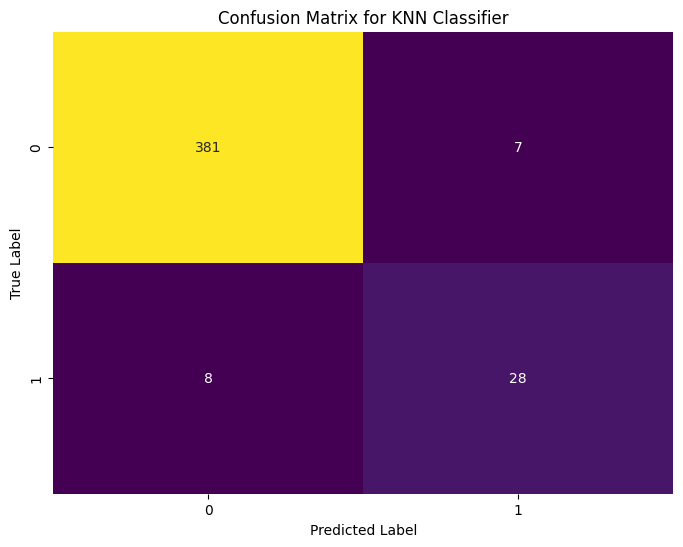

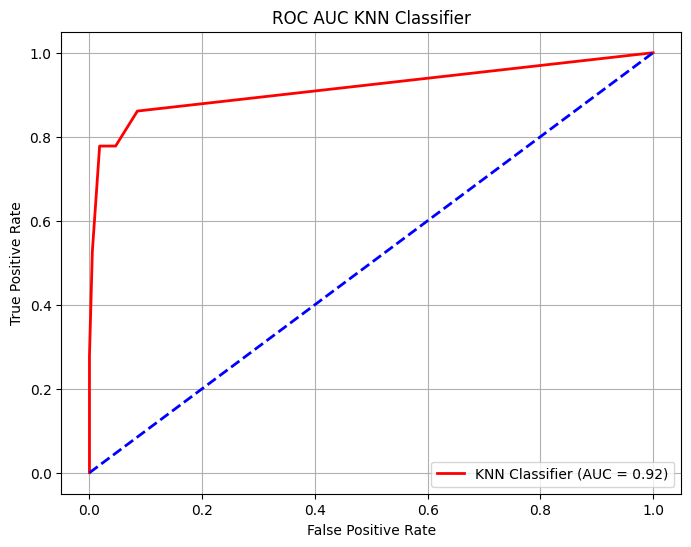

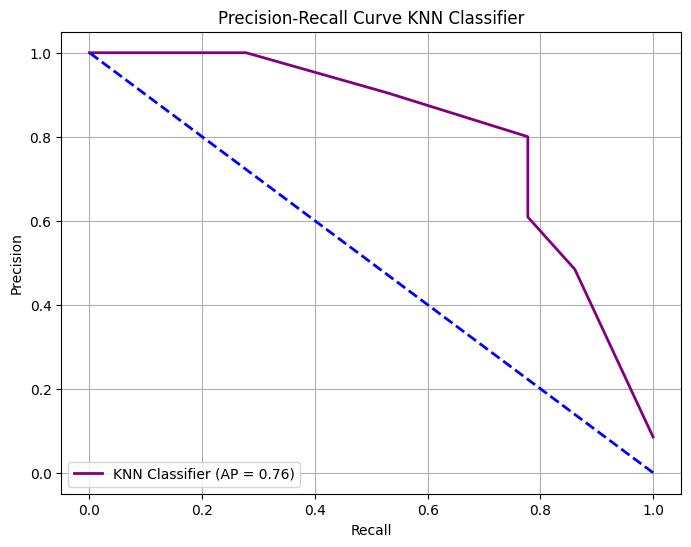

In [6]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
# Ma trận nhầm lẫn (Confusion Matrix Heatmap)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Biểu đồ ROC (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'KNN Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Biểu đồ Precision-Recall (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob_knn)
average_precision = average_precision_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'KNN Classifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve KNN Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [7]:
# Tính Precision, Recall, F1-score, và Accuracy
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

# In ra kết quả
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Precision: 0.800
Recall: 0.778
F1-score: 0.789
Accuracy: 0.965
